In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [7]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

In [5]:
import validation_utils as vu

# Computing the validation statistics (to pick the ones to look at)

In [8]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

Segment_id = 864691135771629819


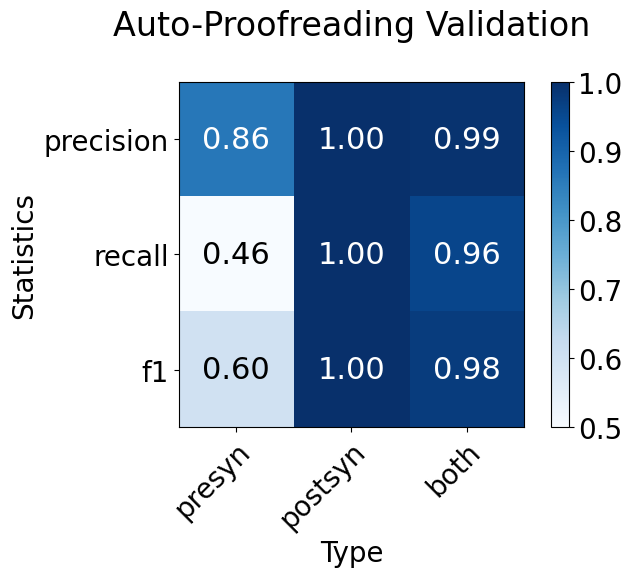

In [46]:
curr_idx = 17
segment_id = segment_ids[curr_idx]
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [49]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
)

Working on Neuron: 864691135771629819


Synapse Category Results, synapse_type = presyn
# of TP = 56
# of TN = 159
# of FP = 9
# of FN = 66
No axon skeleton attribute stored in database table


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [53]:
curr_validation_df

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,171509526,presyn,True,743912,644032,847960,True,TP,864691135771629819,864691135517422218,101617.381899
1,171568488,presyn,True,744812,643140,850680,True,TP,864691135771629819,864691135517422218,100968.301798
2,172021208,presyn,True,737624,758696,834920,False,FP,864691135771629819,864691135517422218,215841.858294
3,172021291,presyn,True,738088,758352,835040,False,FP,864691135771629819,864691135517422218,215504.823111
4,172021407,presyn,True,739048,751872,837160,False,FP,864691135771629819,864691135517422218,208976.760775
...,...,...,...,...,...,...,...,...,...,...,...
1755,209656412,postsyn,True,832972,530756,808680,True,TP,864691135771629819,864691135517422218,107519.512276
1756,210071740,postsyn,True,821748,618904,849880,True,TP,864691135771629819,864691135517422218,117304.476164
1757,203160039,postsyn,False,802668,628660,860320,False,TN,864691135771629819,864691135517422218,111838.694771
1758,216526741,postsyn,False,840848,823300,921320,False,TN,864691135771629819,864691135517422218,310099.974795


In [54]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691135771629819

In [55]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [56]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691135771629819

In [57]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L1': array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]), 'L5': array([1, 2, 3, 5])}
Limb L0 soma angle: 7.62 
Limb L1 soma angle: 172.9 
Limb L2 soma angle: 157.94 
Limb L3 soma angle: 115.16 
Limb L4 soma angle: 155.41 
Limb L5 soma angle: 156.82 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5]

Phase 2: Working on Limb L1
nodes_to_eliminate = [6]

Phase 2: Working on Limb L2
nodes_to_eliminate = [4]

Phase 2: Working on Limb L3
nodes_to_eliminate = []

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L5
nodes_to_eliminate = []

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminate

base_final_widths = [162.61812219 174.38200891 145.92502785]
overall_ais_width = 141.35042771908473
ais_width = 160.97505298376765
Adding the following branches as true axons: [ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
curr_soma_angle = 172.9
max_axon_angle = 172.77777022623957
Changing to a better axon candidate


 --- Working on limb 2, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 2, candidate # 1
0 out of 3 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 3, candidate # 0
0 out of 5 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 4, candidate # 0
0 out of 3 branches are axons
Axon percentage = 0.0
Not addi

({'L1': array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
         53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])},
 {'L5': array([1, 2, 3, 5])})

In [58]:
import proofreading_utils as pru
o_neuron,filter_dict = pru.proofread_neuron_class_predetermined(neuron_obj,
    perform_axon_classification=False,
    inh_exc_class="excitatory",
    plot_limb_branch_filter_with_disconnect_effect = True,

    high_fidelity_axon_on_excitatory = True,
    plot_final_filtered_neuron = False,

    #arguments for the axon high fidelity:
    plot_new_axon_limb_correspondence = True,
    plot_new_limb_object = False,
    plot_final_revised_axon_branch = False,

    verbose = False,
    verbose_outline = True)



 Using high_fidelity_axon_on_excitatory


---Step 1: Applying Dendrite on Axon Filtering

--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 0.14315032958984375 -----


---- Step 2: Applying High Fidelity Axon -----
Starting axon branch was not the limb starting node so generating border vertices and computing upstream branch
upstream_node_to_axon_starting_branch = 6


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [732813.8 554183.9 846115.7]
Time for preparing soma vertices and root: 0.0005018711090087891
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/86926 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 4.0516297817230225
connecting at the root
branches_touching_root = [187]
combining close nodes
combine_threshold = 1300
length of Graph = 25521
After combining close endpoints max(kept_branches_idx) = 187, len(kept_branches_idx) = 175
empty_indices % = 0.0
 conflict_indices % = 0.01801827824057492


  0%|          | 0/80 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/175 [00:00<?, ?it/s]

Decomposing first pass: 15.185918092727661
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.3392181396484375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.06241345405578613
sbv[0].reshape(-1,3) = [[732813.8 554183.9 846115.7]]
closest_sk_pt_coord BEFORE = [732246.27079652 554176.92183191 846349.33379708]
current_skeleton.shape = (580, 2, 3)
node_for_stitch = 2: [732246.27079652 554176.92183191 846349.33379708]
node_for_stitch AFTER = 2: [732246.27079652 554176.92183191 846349.33379708]
possible_node_loc = [  0 580]
possible_node_loc AFTER = [  0 580]
curr_shortest_path = [2, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_pa

  0%|          | 0/9 [00:00<?, ?it/s]

Removed 9 skeletal branches


  0%|          | 0/175 [00:00<?, ?it/s]

173377 173378
For marked faces: None
empty_indices % = 0.0009286068590017188
 conflict_indices % = 0.0


  0%|          | 0/2 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/159 [00:00<?, ?it/s]

Limb Correspondence before stitching = 159
Limb Correspondence AFTER stitching = 159
Readjusting starting axon branch skeleton
Fixing the axon starting branch endpoint to align with upstream branch
Starting Branch 12 skeleton before fix: (580, 2, 3)
Starting Branch 12 skeleton AFTER fix: (581, 2, 3)


concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7ef9faa1cc50>]}
Assigning the old width calculation because no valid new widths


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [732244.83043478 551240.11304348 845546.9826087 ]---------
Starting_edge inside branches_to_conept = [[731976.97883867 553687.40467689 846535.56537164]
 [732244.83043478 551240.11304348 845546.9826087 ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [13]
printing out current edge:
[[732244.83043478 551240.11304348 845546.9826087 ]
 [731976.97883867 553687.40467689 846535.56537164]]
edge_endpoints_to_process was empty so exiting loop after 161 iterations
starting_node in concept map (that should match the starting edge) = 159
Total time for branches to concept conversion = 1.4504122734069824

Done generating concept network 




---- Step 3: Applying Excitatory Filters Post-processing --


--- Working on filter 1:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 50, 'require_two_pairs': False}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}



--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120}



--- Working on filter 4:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': True, 'min_degree_to_find': 4}


min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4



 ---- Total time for applying filter: 48.147462606430054 -----


In [59]:
nviz.plot_axon(o_neuron,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Just want to label thin vs. thick axon

In [60]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(neuron_obj)

Starting axon branch was not the limb starting node so generating border vertices and computing upstream branch
upstream_node_to_axon_starting_branch = 6


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [732813.8 554183.9 846115.7]
Time for preparing soma vertices and root: 0.0006434917449951172
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/86926 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 4.347482204437256
connecting at the root
branches_touching_root = [187]
combining close nodes
combine_threshold = 1300
length of Graph = 25521
After combining close endpoints max(kept_branches_idx) = 187, len(kept_branches_idx) = 175
empty_indices % = 0.0
 conflict_indices % = 0.01801827824057492


  0%|          | 0/80 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/175 [00:00<?, ?it/s]

Decomposing first pass: 15.685124635696411
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.000213623046875
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.57763671875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.07286477088928223
sbv[0].reshape(-1,3) = [[732813.8 554183.9 846115.7]]
closest_sk_pt_coord BEFORE = [732246.27079652 554176.92183191 846349.33379708]
current_skeleton.shape = (580, 2, 3)
node_for_stitch = 2: [732246.27079652 554176.92183191 846349.33379708]
node_for_stitch AFTER = 2: [732246.27079652 554176.92183191 846349.33379708]
possible_node_loc = [  0 580]
possible_node_loc AFTER = [  0 580]
curr_shortest_path = [2, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_path_length

  0%|          | 0/9 [00:00<?, ?it/s]

Removed 9 skeletal branches


  0%|          | 0/175 [00:00<?, ?it/s]

173377 173378
For marked faces: None
empty_indices % = 0.0009516778368651156
 conflict_indices % = 0.0


  0%|          | 0/2 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/159 [00:00<?, ?it/s]

Limb Correspondence before stitching = 159
Limb Correspondence AFTER stitching = 159
Readjusting starting axon branch skeleton
Fixing the axon starting branch endpoint to align with upstream branch
Starting Branch 12 skeleton before fix: (580, 2, 3)
Starting Branch 12 skeleton AFTER fix: (581, 2, 3)
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7efa8a4cc470>]}
Assigning the old width calculation because no valid new widths


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [732244.83043478 551240.11304348 845546.9826087 ]---------
Starting_edge inside branches_to_conept = [[731976.97883867 553687.40467689 846535.56537164]
 [732244.83043478 551240.11304348 845546.9826087 ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [13]
printing out current edge:
[[732244.83043478 551240.11304348 845546.9826087 ]
 [731976.97883867 553687.40467689 846535.56537164]]
edge_endp

In [61]:
neuron_obj_high_fid_axon.axon_limb_branch_dict

{'L1': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158])}

In [63]:
import neuron_searching as ns

In [79]:
large_width_limb_branch = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = "(median_mesh_center > 90) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=["L1"],
                                   ))
large_width_limb_branch

nviz.plot_limb_branch_dict(neuron_obj_high_fid_axon,
                          large_width_limb_branch,
                          visualize_type=["mesh","skeleton"])

{'L1': array([ 11,  12,  14,  16,  19,  21,  23,  25,  28,  29,  31,  34,  35,
         39,  42,  43,  44,  45,  46,  51,  52,  54,  55,  58,  59,  60,
         61,  62,  64,  72,  79,  83, 105, 115, 116, 119, 128, 131, 137,
        139, 142, 143, 149, 154, 155])}


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Would love to be able to identify the boutons


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


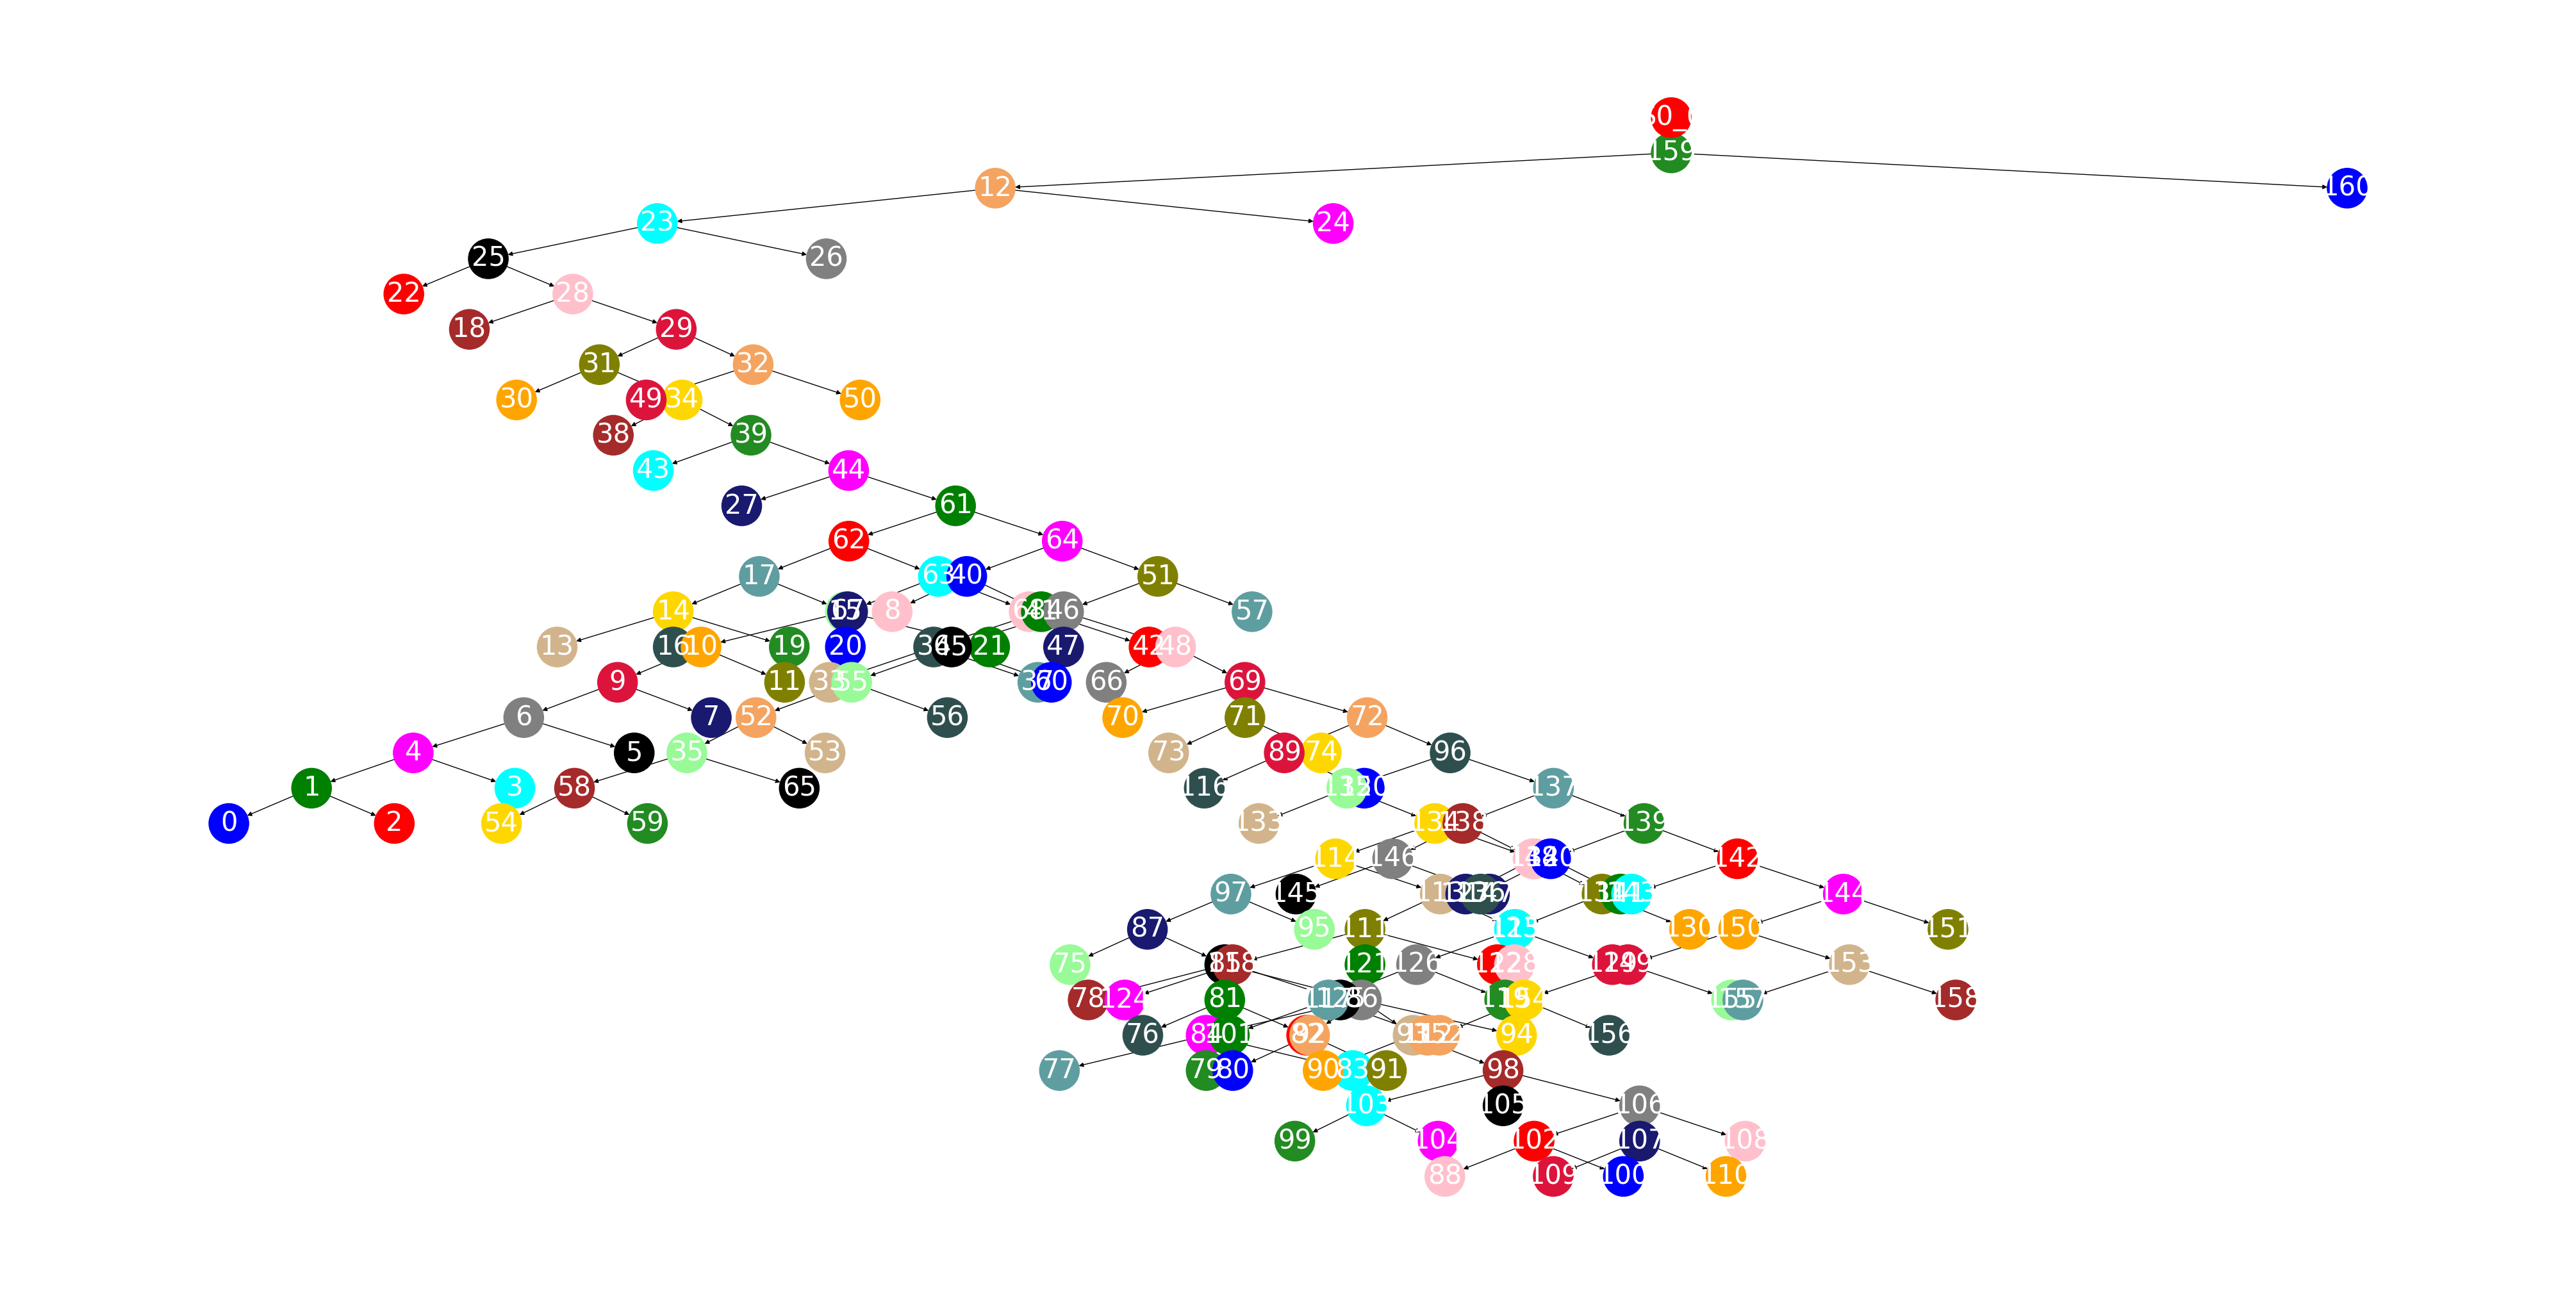

In [87]:
nviz.visualize_neuron_specific_limb(neuron_obj_high_fid_axon,
                                   1)

In [315]:
branch_obj = neuron_obj_high_fid_axon[1][55]
branch_obj = neuron_obj_high_fid_axon[1][30] #good no boutons
branch_obj = neuron_obj_high_fid_axon[1][32] #good no boutons
branch_obj = neuron_obj_high_fid_axon[1][40]
branch_obj = neuron_obj_high_fid_axon[1][45]
#branch_obj = neuron_obj_high_fid_axon[1][52]
#branch_obj = neuron_obj_high_fid_axon[1][0]
#branch_obj = neuron_obj_high_fid_axon[1][10]
branch_obj = neuron_obj_high_fid_axon[1][20]
branch_obj = neuron_obj_high_fid_axon[1][22]
branch_obj = neuron_obj_high_fid_axon[1][25]
ex_mesh = branch_obj.mesh
nviz.plot_objects(ex_mesh)

In [316]:
import trimesh_utils as tu
b_meshes,non_b_meshes = tu.bouton_meshes(branch_obj,
                 clusters=4,
                 smoothness=0.1,
                  plot_segmentation=True,
                 filter_away_end_meshes=True,
                 cdf_threshold = 0.35,
                 verbose=True,
                 min_size_threshold =50,
                 max_size_threshold=200,
                 size_type = "faces",
                return_non_boutons = True,
                ray_trace_filter = "ray_trace_percentile",              
                ray_trace_percentile = 70,
                  ray_trace_threshold = 270,
                 )
b_meshes,non_b_meshes

  0%|          | 0/9 [00:00<?, ?it/s]

Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(517, 3), faces.shape=(1024, 3))> (0.41814549999999995)
Mesh 1: <trimesh.Trimesh(vertices.shape=(169, 3), faces.shape=(327, 3))> (0.52675)
Mesh 2: <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(274, 3))> (0.43669349999999996)
Mesh 3: <trimesh.Trimesh(vertices.shape=(114, 3), faces.shape=(197, 3))> (0.635623)
Mesh 4: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(117, 3))> (0.324096)
Mesh 5: <trimesh.Trimesh(vertices.shape=(8, 3), faces.shape=(11, 3))> (0.0347312)
Mesh 6: <trimesh.Trimesh(vertices.shape=(6, 3), faces.shape=(7, 3))> (0.0532141)
Mesh 7: <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(5, 3))> (0.632746)
Mesh 8: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))> (0.0)


# of bouton meshes = 5:
boutons_idx = [0 1 2 3 7]
bouton_meshes = [<trimesh.Trimesh(vertices.shape=(517, 3), faces.shape=(1024, 3))>
 <trimesh.Trimesh(vertices.shape=(169, 3), faces.shape=(327, 3))>
 <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(274, 3))>
 <trimesh.Trimesh(vertices.shape=(114, 3), faces.shape=(197, 3))>
 <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(5, 3))>]
bouton_meshes_cdf = [0.4181455 0.52675   0.4366935 0.635623  0.632746 ]
end_meshes_idx = [4, 3]

--After Filtering --
# of bouton meshes = 4:
bouton_meshes = [<trimesh.Trimesh(vertices.shape=(517, 3), faces.shape=(1024, 3))>
 <trimesh.Trimesh(vertices.shape=(169, 3), faces.shape=(327, 3))>
 <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(274, 3))>
 <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(5, 3))>]
bouton_meshes_cdf = [0.4181455 0.52675   0.4366935 0.632746 ]
Applying size threshold of 50< faces <= 200
boutons_idx = []

--After Filtering for size --
# of bouton meshes = 0:
bouton_m

(array([], dtype=object),
 array([<trimesh.Trimesh(vertices.shape=(517, 3), faces.shape=(1024, 3))>,
        <trimesh.Trimesh(vertices.shape=(169, 3), faces.shape=(327, 3))>,
        <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(274, 3))>,
        <trimesh.Trimesh(vertices.shape=(114, 3), faces.shape=(197, 3))>,
        <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(117, 3))>,
        <trimesh.Trimesh(vertices.shape=(8, 3), faces.shape=(11, 3))>,
        <trimesh.Trimesh(vertices.shape=(6, 3), faces.shape=(7, 3))>,
        <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(5, 3))>,
        <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>],
       dtype=object))

# Run bouton finding on all of the axon below a ertain width

In [317]:
large_width_limb_branch = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = "(median_mesh_center > 150) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=["L1"],
                                   ))
large_width_limb_branch

nviz.plot_limb_branch_dict(neuron_obj_high_fid_axon,
                          large_width_limb_branch,
                          visualize_type=["mesh","skeleton"])


 Working on visualization type: mesh

 Working on visualization type: skeleton


'L1'

In [320]:
ax_limb_name = neuron_obj_high_fid_axon.axon_limb_name
axon_check_for_boutons = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = "(median_mesh_center < 150) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=[ax_limb_name],
                                   ))
axon_check_for_boutons

{'L1': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,
         28,  30,  32,  33,  35,  36,  37,  38,  40,  41,  45,  47,  48,
         49,  50,  51,  52,  53,  55,  56,  57,  58,  59,  62,  63,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 156, 157, 158])}

In [379]:
branch_obj.width_new[w_t]

[autoreload of neuron_visualizations failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/meshAfterParty/neuron_visualizations.py", line 2099
    s

nan

In [406]:
"""
Psuedocode: Iterate through all of the branch objects and 
compute the bouton meshes and store as boutons


"""
total_bouton_list = []
from tqdm_utils import tqdm

filter_non_bouton_meshes_by_size = True
non_bouton_size_threshold = 80

for l_idx,branch_list in axon_check_for_boutons.items():
    for b in tqdm(branch_list):
        branch_obj = neuron_obj_high_fid_axon[l_idx][b]
        b_meshes, non_b_meshes, b_meshes_widths, non_b_meshes_widths= tu.bouton_meshes(branch_obj,
                                            return_non_boutons=True,
                                                 return_cdf_widths=True)
        

        branch_obj.boutons = list(b_meshes)
        branch_obj.n_boutons = len(branch_obj.boutons)
        branch_obj.non_boutons = list(non_b_meshes)
        branch_obj.n_non_boutons = len(branch_obj.non_boutons)
        total_bouton_list += list(b_meshes)
        
        #filter the non bouton meshes
        if filter_non_bouton_meshes_by_size:
            non_b_sizes = np.array([tu.mesh_size(m,"faces") for m in non_b_meshes])
            non_bouton_idx = np.where(non_b_sizes > non_bouton_size_threshold)[0]
            non_bouton_filtered_away = np.delete(np.arange(len(non_b_meshes)),non_bouton_idx)
            branch_obj.non_bouton_filtered_away = non_bouton_filtered_away
        else:
            non_boutons_filtered_away= np.arange(len(branch_obj.non_boutons))
        
        #calculating the mean/width width of boutons and non_boutons
        branch_obj.width_array["bouton"]  = b_meshes_widths
        branch_obj.width_array["non_bouton"]  = non_b_meshes_widths
        
        branch_obj.width_new["bouton_mean"]  = np.mean(b_meshes_widths)
        branch_obj.width_new["bouton_median"]  = np.median(b_meshes_widths)
        
        non_b_widths_with_filter = np.array(non_b_meshes_widths)[non_bouton_filtered_away]
        branch_obj.width_new["non_bouton_mean"]  = np.mean(non_b_widths_with_filter)
        branch_obj.width_new["non_bouton_median"]  = np.median(non_b_widths_with_filter)
 

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [414]:
branch_obj.width_array

{'median_mesh_center': array([ 84.4026371 ,  91.14807457,  69.70033167, 105.52941757,
         97.87025601, 123.27161594,  94.20543901,  77.21818394,
         79.61183752,  78.81358668, 104.96173694,  25.79860398,
         82.43371157,  97.40504485,  82.21474725,  78.63829777,
         71.29991318,  66.703295  ,  63.61167299,  60.49609349,
         31.5042986 ]),
 'no_spine_median_mesh_center': array([ 84.4026371 ,  91.14807457,  69.70033167, 105.52941757,
         97.87025601, 123.27161594,  94.20543901,  77.21818394,
         79.61183752,  78.81358668, 104.96173694,  25.79860398,
         82.43371157,  97.40504485,  82.21474725,  78.63829777,
         71.29991318,  66.703295  ,  63.61167299,  60.49609349,
         31.5042986 ]),
 'bouton': array([357.35470952, 553.25309219]),
 'non_bouton': array([130.09044055, 121.83745874, 117.65299511, 246.20558244,
        305.09354401,  53.74357275,  49.14461458,   0.        ])}

In [416]:
branch_obj.boutons

[<trimesh.Trimesh(vertices.shape=(87, 3), faces.shape=(167, 3))>,
 <trimesh.Trimesh(vertices.shape=(83, 3), faces.shape=(160, 3))>]

In [418]:
branch_obj.non_bouton_filtered_away

array([3, 4, 5, 6, 7])

In [421]:
kept_non_boutons = np.delete(branch_obj.non_boutons,branch_obj.non_bouton_filtered_away)
[kept_non_boutons

array([<trimesh.Trimesh(vertices.shape=(155, 3), faces.shape=(296, 3))>,
       <trimesh.Trimesh(vertices.shape=(87, 3), faces.shape=(165, 3))>,
       <trimesh.Trimesh(vertices.shape=(76, 3), faces.shape=(143, 3))>],
      dtype=object)

In [455]:
limb_obj = neuron_obj_high_fid_axon[l_idx]
branches_with_no_non_boutons = [k for k in limb_obj.get_branch_names()
                               if hasattr(limb_obj[k],"boutons") and len(limb_obj[k].boutons) > 3]
branches_with_no_non_boutons

[1,
 7,
 8,
 10,
 14,
 18,
 27,
 33,
 35,
 40,
 45,
 68,
 72,
 89,
 96,
 100,
 136,
 138,
 140,
 144,
 148]

In [ ]:
branch_obj.non_boutons

In [458]:
curr_idx = 15
branch_idx = branches_with_no_non_boutons[curr_idx]
print(f"Branch {branch_idx}")
branch_obj = neuron_obj_high_fid_axon[l_idx][branch_idx]
nviz.plot_branch_with_boutons(branch_obj,
                             non_bouton_filtered_away_color="green")

Branch 100
bouton_mean:555.9202458323794
bouton_median:477.0876736862534
non_bouton_mean:164.90747925351468
non_bouton_median:188.10386893262176
no_spine_median_mesh_center:57.80679658418332


In [462]:
import width_utils as wu




"""
Psuedocode: Iterate through all of the branch objects and 
compute the bouton meshes and store as boutons


"""
total_bouton_list = []
from tqdm_utils import tqdm

width_name = "bouton_median"

for l_idx,branch_list in axon_check_for_boutons.items():
    for b in tqdm(branch_list):
        branch_obj = neuron_obj_high_fid_axon[l_idx][b]
        b_meshes= tu.bouton_meshes(branch_obj,
                                            return_non_boutons=False,
                                                 return_cdf_widths=False)
        

        branch_obj.boutons = list(b_meshes)
        branch_obj.n_boutons = len(branch_obj.boutons)
        branch_obj.non_boutons = list(non_b_meshes)
        branch_obj.n_non_boutons = len(branch_obj.non_boutons)
        total_bouton_list += list(b_meshes)
        
        
        # ----- Doing the new width calculation -------- #
        
        skeleton_segment_size=1000
        width_segment_size = None
        distance_by_mesh_center = True
        no_spines = False
        summary_measure = "median"

        if len(b_meshes) > 0:
            if verbose:
                print(f"Calculating new width because had {branch_obj.n_boutons} boutons")
            current_width_array,current_width = wu.calculate_new_width(branch_obj, 
                          skeleton_segment_size=skeleton_segment_size,
                          width_segment_size=width_segment_size, 
                          distance_by_mesh_center=distance_by_mesh_center,
                          no_spines=no_spines,
                          summary_measure=summary_measure,
                          return_average=True,
                          print_flag=False,
                        no_boutons=True,
                            old_width_calculation=branch_obj.width_new["no_spine_median_mesh_center"])
                                  
        else:
            current_width = branch_obj.width_new["no_spine_median_mesh_center"]
            current_width_array = branch_obj.width_array["no_spine_median_mesh_center"] 
        #calculating the mean/width width of boutons and non_boutons
        
        branch_obj.width_new[width_name]  = current_width
        branch_obj.width_array[width_name] = current_width_array


  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/42 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/24 [00:00<?, ?it/s]

Calculating new width because had 4 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Calculating new width because had 4 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/14 [00:00<?, ?it/s]

Calculating new width because had 4 boutons


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/42 [00:00<?, ?it/s]

Calculating new width because had 11 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Calculating new width because had 4 boutons


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/18 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/46 [00:00<?, ?it/s]

Calculating new width because had 15 boutons


  0%|          | 0/14 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/30 [00:00<?, ?it/s]

Calculating new width because had 8 boutons


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/14 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/18 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/8 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/18 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/11 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Calculating new width because had 16 boutons


  0%|          | 0/11 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/8 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/22 [00:00<?, ?it/s]

Calculating new width because had 4 boutons


  0%|          | 0/6 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Calculating new width because had 6 boutons


  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/14 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/11 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/20 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/15 [00:00<?, ?it/s]

Calculating new width because had 2 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Calculating new width because had 6 boutons


  0%|          | 0/19 [00:00<?, ?it/s]

Calculating new width because had 5 boutons


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/17 [00:00<?, ?it/s]

Calculating new width because had 6 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/21 [00:00<?, ?it/s]

Calculating new width because had 6 boutons


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/6 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Calculating new width because had 8 boutons


  0%|          | 0/12 [00:00<?, ?it/s]

Calculating new width because had 3 boutons


  0%|          | 0/7 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Calculating new width because had 1 boutons


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

(array([ 27.34333849,  91.73641362,  78.04917818,  46.65382439,
         70.61717552,  46.89518737,  48.34062682,  47.36335532,
         47.77131931,  57.82101845,  70.06306386,  65.08969444,
         48.62207595,  55.32662673,  41.02782994,  86.71437251,
         56.18491739,  40.01755004,  66.75918634,  48.91340458,
         50.04486792,  56.18491739,  80.55598035,  99.65337111,
         54.98870895,  58.63753321,  74.52880676,  61.37951025,
         54.13241734,  56.18491739,  79.28751824,  82.0636838 ,
         41.49410897,  71.42191641,  66.21184957,  95.39892436,
         77.95418286,  38.22519781,  47.98640038,  56.18491739,
         56.18491739,  66.74613243,  62.75418683,  63.43004692,
         62.89326556,  56.02970343,  56.34013134,  72.3026819 ,
         53.98363078,  57.79257472,  49.23983867,  44.18083647,
         56.18491739,  73.62274667,  55.51578376,  41.93347562,
         63.90169139,  71.90715702,  50.3242619 ,  55.86840723,
         46.96466976,  64.44329203,  51.

In [463]:
import proofreading_utils as pu


In [466]:
[k for k in dir(pu) if "width" in k]

['doubling_back_and_width_elimination_limb_branch_dict',
 'edges_to_create_and_delete_by_doubling_back_and_width',
 'edges_to_cut_by_doubling_back_and_width_change',
 'filter_away_large_double_back_or_width_changes']

In [474]:
exc_double_back_and_width_change_filter = pru.make_filter_dict("double_back_and_width_change",
                                                         pru.filter_away_large_double_back_or_width_changes,
                                                          dict(perform_double_back_errors=True,
                                                              skip_double_back_errors_for_axon=False,
                                                              #double_back_threshold = 140,
                                                               
                                                               width_jump_threshold = 50,
                                                               running_width_jump_method=True, 
                                                               
                                                               
                                                               double_back_axon_like_threshold=145,
                                                               #double_back_threshold = 115,
                                                               double_back_threshold = 120,
                                                               width_name = "bouton_median"
                                                              ),catch_error=False,
                                                               
                                                               
                                                         )

bouton_double_back_filter = [exc_double_back_and_width_change_filter]

In [475]:
plot_limb_branch_filter_with_disconnect_effect = True
verbose= True
verbose_outline= True


o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj_high_fid_axon,
                                        filter_list = bouton_double_back_filter,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)


--- Working on filter 0:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 50, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'width_name': 'bouton_median'}


----------------------- Running Filter ------------------

--- Working on Limb L0 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L2 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L3 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L4 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L5 ---
edges_to_create = []
edges_to_create = []


KeyboardInterrupt: 

In [ ]:
o_neuron_pre

In [478]:
minnie.AutoProofreadNeurons3() & "spine_category = 'densely_spined'"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134737851386,0,0.25,30.00,0,0,0,3,1,excitatory,densely_spined,0,0,0.0,0.0,482596,506.42,1,1,287591,88475,18278,9555,0,21731,43242,0,0,0,0,1,1,8,

In [479]:
minnie.AutoProofreadNeurons3() & "cell_type_predicted = 'inhibitory'"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,0,3,1,inhibitory,no_spined,0,0,0.0,0.0,73352,506.05,1,1,84299,173386,16102,11139,248,11723,24809,0,0,0,0,1,0,0,Non

In [441]:
nviz.plot_objects(meshes=new_branch_mesh,
                 meshes_colors="random")

In [373]:
non_b_meshes_too_small_colors = mu.generate_unique_random_color_list(len(non_b_meshes_too_small),
                                    colors_to_omit=["black","red"])

color_list = [bouton_color]*len(b_meshes) + [non_bouton_color]*len(non_b_meshes) + non_b_meshes_too_small_colors
meshes_list = list(b_meshes) + list(non_b_meshes) + list(non_b_meshes_too_small)

nviz.plot_objects(main_mesh = branch_obj.mesh,
                      main_mesh_alpha=1,
                     main_mesh_color=main_mesh_color,
                     meshes=meshes_list,
                     meshes_colors=color_list,
                     mesh_alpha=1)

In [361]:
branch_obj = neuron_obj_high_fid_axon[l_idx][1]

bouton_color = "red"
non_bouton_color = "black"
main_mesh_color = "green"

if hasattr(branch_obj,"boutons"):
    b_meshes = branch_obj.boutons
    non_b_meshes = branch_obj.non_boutons
    
    width_types = ["bouton_mean",
                  "bouton_median",
                  "non_bouton_mean",
                  "non_bouton_median"]
    for w_t in width_types:
        print(f"{w_t}:{branch_obj.width_new[w_t]}")
    
    color_list = [bouton_color]*len(b_meshes) + [non_bouton_color]*len(non_b_meshes)
    meshes_list = b_meshes + non_b_meshes
    
    nviz.plot_objects(main_mesh = branch_obj.mesh,
                      main_mesh_alpha=1,
                     main_mesh_color=main_mesh_color,
                     meshes=meshes_list,
                     meshes_colors=color_list,
                     mesh_alpha=1)
else:
    print(f"No boutons analysis")

bouton_mean:470.0388708502502
bouton_median:459.8641629330177
non_bouton_mean:143.2645227995132
non_bouton_median:121.43782923804406


AttributeError: 'Branch' object has no attribute 'boutons'

In [346]:
nviz.plot_objects(neuron_obj_high_fid_axon.mesh,
                  meshes=total_bouton_list,
                  meshes_colors="red",
                 mesh_alpha=1)

In [ ]:
install.packages('fivethirtyeightdata', repos = 'https://fivethirtyeightdata.github.io/drat/', type = 'source')

nutrition_pvalues